In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_excel("/Users/minsu/Desktop/Raisin_Dataset.xlsx")

df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [2]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [3]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [4]:
df['Class'].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

In [5]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [6]:
X = df.drop("Class", axis=1)
X.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [7]:
y = df['Class']
y

0      Kecimen
1      Kecimen
2      Kecimen
3      Kecimen
4      Kecimen
        ...   
895      Besni
896      Besni
897      Besni
898      Besni
899      Besni
Name: Class, Length: 900, dtype: object

In [8]:
X.shape

(900, 7)

In [9]:
y.shape

(900,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import LabelEncoder

# 레이블 인코더 생성
label_encoder = LabelEncoder()

# y_train, y_test를 숫자로 변환
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Binary Classification

In [13]:
model = Sequential([
    Input(shape=(7,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

2024-09-18 21:09:35.155824: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-09-18 21:09:35.155841: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-09-18 21:09:35.155845: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-09-18 21:09:35.155859: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-18 21:09:35.155867: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
print(X_train.dtypes)  # 각 열의 데이터 타입 확인
print(y_train.dtype)  # 타겟 값의 데이터 타입 확인

Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
Extent             float64
Perimeter          float64
dtype: object
int64


In [16]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15


2024-09-18 21:09:35.518516: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5192 - loss: 636.7085 - val_accuracy: 0.4963 - val_loss: 72.1247
Epoch 2/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5064 - loss: 49.8132 - val_accuracy: 0.5333 - val_loss: 21.0069
Epoch 3/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4751 - loss: 24.6774 - val_accuracy: 0.4889 - val_loss: 40.8719
Epoch 4/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5550 - loss: 24.2282 - val_accuracy: 0.5481 - val_loss: 12.6656
Epoch 5/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5601 - loss: 18.9846 - val_accuracy: 0.4889 - val_loss: 23.2712
Epoch 6/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5290 - loss: 31.5265 - val_accuracy: 0.6148 - val_loss: 6.9792
Epoch 7/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5545 - loss: 26.9453 - val_accuracy: 0.5481 - val_loss: 13.9335
Epoch 8/15
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5076 - loss: 76.7028 - val_accuracy: 0.6667 - val_

In [17]:
from sklearn.metrics import accuracy_score, f1_score
y_pred_clf =  model.predict(X_test)

# 확률을 0 또는 1로 변환 (0.5를 기준으로 이진화)
y_pred_clf = (y_pred_clf > 0.5).astype(int)

# F1 스코어
f1 = f1_score(y_test, y_pred_clf)

y_acc_clf = accuracy_score(y_test, y_pred_clf)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [18]:
print(f'acc: {y_acc_clf:.2f}')
print(f'f1: {f1:.2f}')

acc: 0.74
f1: 0.78


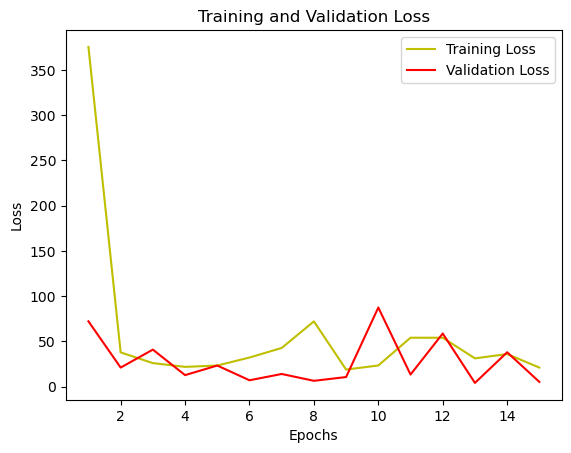

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

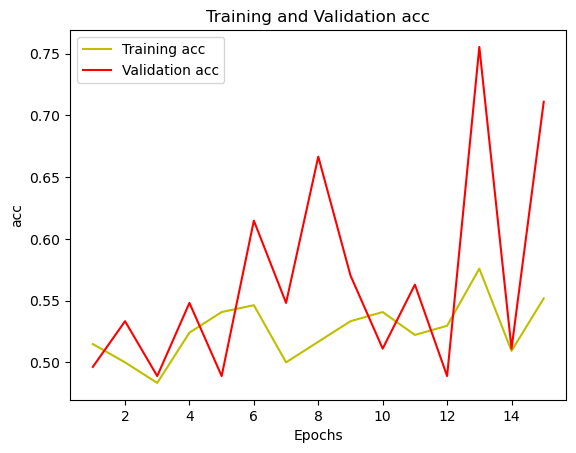

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [21]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6638 - loss: 7.9135 - val_accuracy: 0.6519 - val_loss: 8.3935
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7105 - loss: 7.7436 - val_accuracy: 0.5852 - val_loss: 13.4038
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5555 - loss: 16.8844 - val_accuracy: 0.6593 - val_loss: 6.8023
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6883 - loss: 8.5235 - val_accuracy: 0.5185 - val_loss: 25.6127
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5233 - loss: 28.2578 - val_accuracy: 0.5185 - val_loss: 22.6987
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5891 - loss: 20.5862 - val_accuracy: 0.6815 - val_loss: 7.6145
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6939 - loss: 7.8154 - val_accuracy: 0.5259 - val_loss: 20.8706
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5852 - loss: 17.6903 - val_accuracy: 0.5556 - v

In [22]:
from sklearn.metrics import accuracy_score, f1_score
y_pred_clf =  model.predict(X_test)

# 확률을 0 또는 1로 변환 (0.5를 기준으로 이진화)
y_pred_clf = (y_pred_clf > 0.5).astype(int)

# F1 스코어
f1 = f1_score(y_test, y_pred_clf)

y_acc_clf = accuracy_score(y_test, y_pred_clf)

print(f'acc: {y_acc_clf:.2f}')
print(f'f1: {f1:.2f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step
acc: 0.53
f1: 0.67


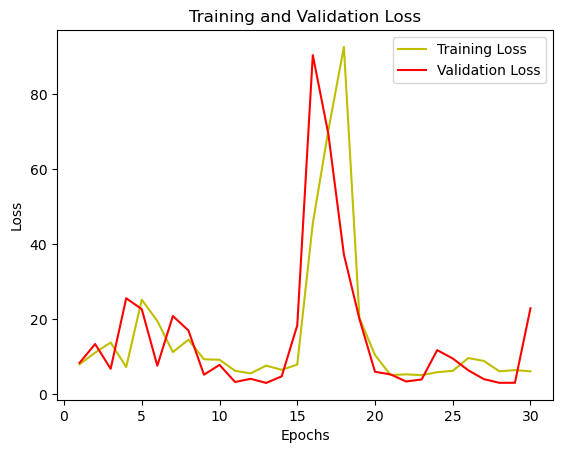

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

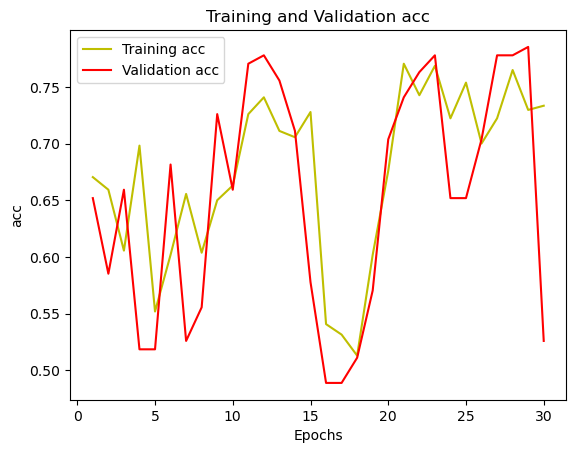

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

# Dropout, L2 정규화 적용

In [26]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

model = Sequential([
    Input(shape=(7,)),  # 입력층
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),  # L2 정규화 적용
    Dropout(0.5),  # 50%의 뉴런을 무작위로 비활성화
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),  # L2 정규화 적용
    Dropout(0.5),  # 50%의 뉴런을 무작위로 비활성화
    Dense(1, activation='sigmoid')  # 출력층 (이진 분류)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 801 (3.13 KB)

 Trainable params: 801 (3.13 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5061 - loss: 15701.7090 - val_accuracy: 0.5111 - val_loss: 4734.8013
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5192 - loss: 10171.0498 - val_accuracy: 0.5111 - val_loss: 1416.9043
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4873 - loss: 9608.2744 - val_accuracy: 0.5259 - val_loss: 123.6666
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4832 - loss: 7196.8481 - val_accuracy: 0.5111 - val_loss: 304.2332
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5319 - loss: 4989.8345 - val_accuracy: 0.5037 - val_loss: 445.2049
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4708 - loss: 4753.6147 - val_accuracy: 0.4889 - val_loss: 100.9958
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4334 - loss: 3981.6611 - val_accuracy: 0.5111 - val_loss: 33.9550
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5378 - loss: 2

In [28]:
y_pred_clf =  model.predict(X_test)

# 확률을 0 또는 1로 변환 (0.5를 기준으로 이진화)
y_pred_clf = (y_pred_clf > 0.5).astype(int)

# F1 스코어
f1 = f1_score(y_test, y_pred_clf)

y_acc_clf = accuracy_score(y_test, y_pred_clf)

print(f'acc: {y_acc_clf:.2f}')
print(f'f1: {f1:.2f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
acc: 0.49
f1: 0.66


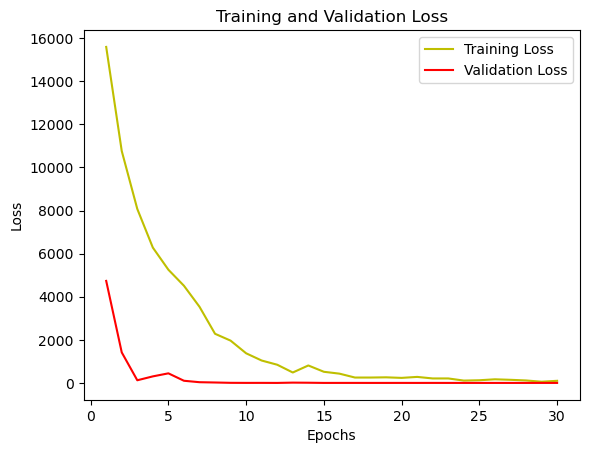

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

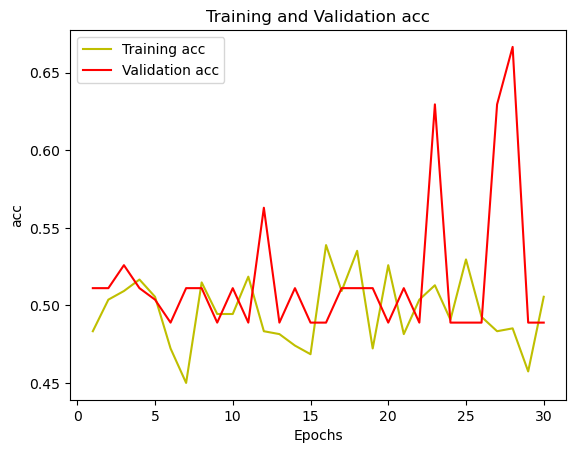

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

# Dense Layer (64) 추가

In [32]:
model = Sequential([
    Input(shape=(7,)),  # 입력층
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),  # L2 정규화 적용
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),  # L2 정규화 적용
    Dropout(0.5),  # 50%의 뉴런을 무작위로 비활성화
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),  # L2 정규화 적용
    Dropout(0.5),  # 50%의 뉴런을 무작위로 비활성화
    Dense(1, activation='sigmoid')  # 출력층 (이진 분류)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4972 - loss: 12372.2842 - val_accuracy: 0.4889 - val_loss: 2335.6104
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5212 - loss: 7219.2896 - val_accuracy: 0.4889 - val_loss: 753.7899
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4498 - loss: 5870.2622 - val_accuracy: 0.5111 - val_loss: 50.6277
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4765 - loss: 4706.0898 - val_accuracy: 0.4889 - val_loss: 72.0192
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4831 - loss: 3674.1604 - val_accuracy: 0.4889 - val_loss: 23.0681
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4847 - loss: 2861.9417 - val_accuracy: 0.5111 - val_loss: 140.0175
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4816 - loss: 2557.3984 - val_accuracy: 0.5111 - val_loss: 207.6600
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4914 - loss: 22

In [33]:
y_pred_clf =  model.predict(X_test)

# 확률을 0 또는 1로 변환 (0.5를 기준으로 이진화)
y_pred_clf = (y_pred_clf > 0.5).astype(int)

# F1 스코어
f1 = f1_score(y_test, y_pred_clf)

y_acc_clf = accuracy_score(y_test, y_pred_clf)

print(f'acc: {y_acc_clf:.2f}')
print(f'f1: {f1:.2f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
acc: 0.49
f1: 0.66


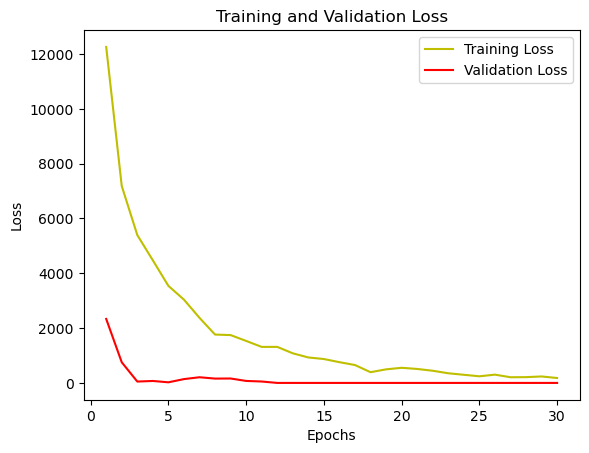

In [34]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

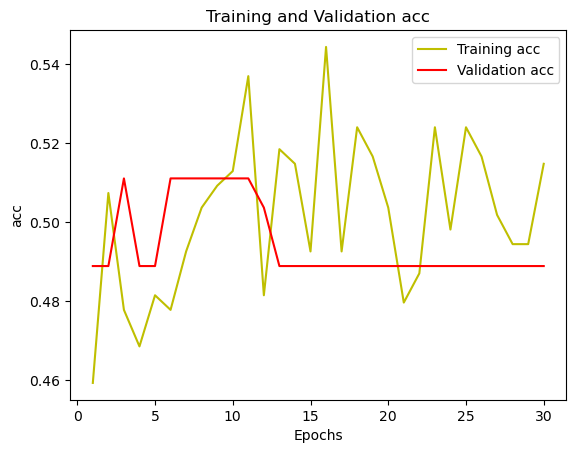

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

# 데이터 스케일링

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5122 - loss: 0.7378 - val_accuracy: 0.4889 - val_loss: 0.7368
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4970 - loss: 0.7336 - val_accuracy: 0.4889 - val_loss: 0.7313
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5043 - loss: 0.7274 - val_accuracy: 0.4889 - val_loss: 0.7266
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4736 - loss: 0.7276 - val_accuracy: 0.4889 - val_loss: 0.7220
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5286 - loss: 0.7130 - val_accuracy: 0.4889 - val_loss: 0.7114
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5159 - loss: 0.7039 - val_accuracy: 0.4889 - val_loss: 0.6876
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4853 - loss: 0.6862 - val_accuracy: 0.4889 - val_loss: 0.6528
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5023 - loss: 0.6469 - val_accuracy: 0.4889 - v

In [38]:
y_pred_clf =  model.predict(X_test_scaled)

# 확률을 0 또는 1로 변환 (0.5를 기준으로 이진화)
y_pred_clf = (y_pred_clf > 0.5).astype(int)

# F1 스코어
f1 = f1_score(y_test, y_pred_clf)

y_acc_clf = accuracy_score(y_test, y_pred_clf)

print(f'acc: {y_acc_clf:.2f}')
print(f'f1: {f1:.2f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
acc: 0.89
f1: 0.89


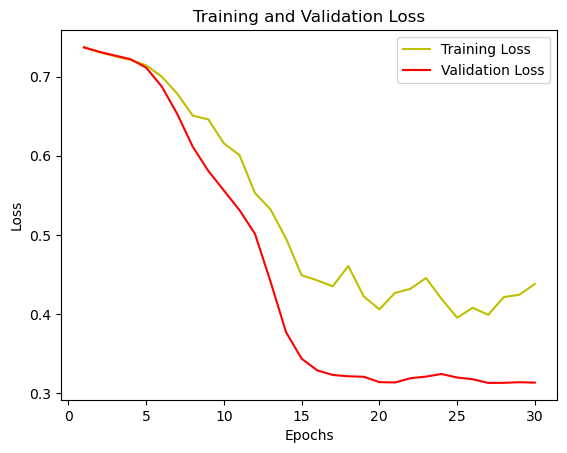

In [39]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

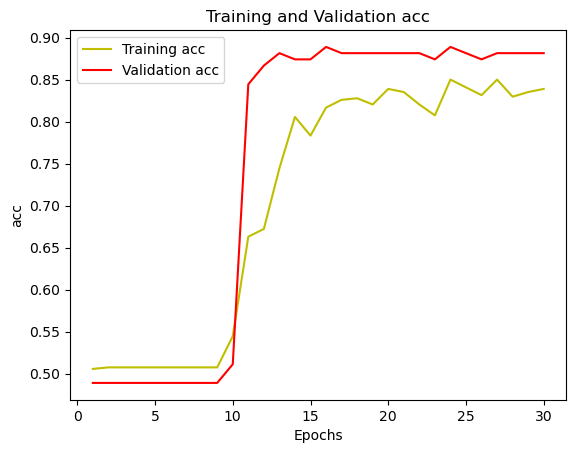

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

# learning Rate Default -> 0.0005 변경

In [42]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0005)  # 학습률 0.005 변경
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8229 - loss: 0.4275 - val_accuracy: 0.8815 - val_loss: 0.3115
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8456 - loss: 0.4076 - val_accuracy: 0.8815 - val_loss: 0.3113
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8333 - loss: 0.4477 - val_accuracy: 0.8889 - val_loss: 0.3120
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8322 - loss: 0.4265 - val_accuracy: 0.8889 - val_loss: 0.3111
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8091 - loss: 0.4733 - val_accuracy: 0.8815 - val_loss: 0.3125
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8304 - loss: 0.4311 - val_accuracy: 0.8815 - val_loss: 0.3134
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8454 - loss: 0.4267 - val_accuracy: 0.8815 - val_loss: 0.3139
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8343 - loss: 0.4004 - val_accuracy: 0.8815 - va

In [43]:
y_pred_clf =  model.predict(X_test_scaled)

# 확률을 0 또는 1로 변환 (0.5를 기준으로 이진화)
y_pred_clf = (y_pred_clf > 0.5).astype(int)

# F1 스코어
f1 = f1_score(y_test, y_pred_clf)

y_acc_clf = accuracy_score(y_test, y_pred_clf)

print(f'acc: {y_acc_clf:.2f}')
print(f'f1: {f1:.2f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
acc: 0.89
f1: 0.90


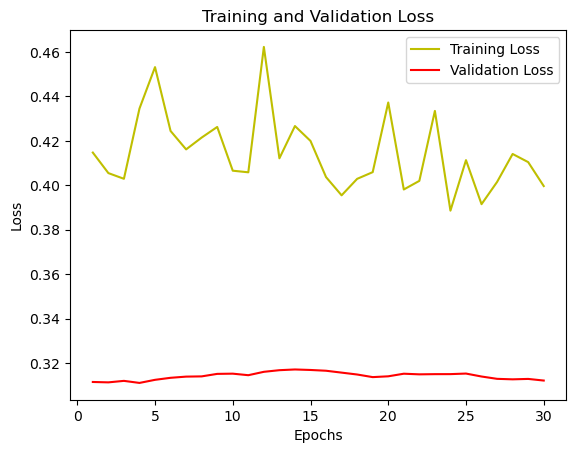

In [44]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

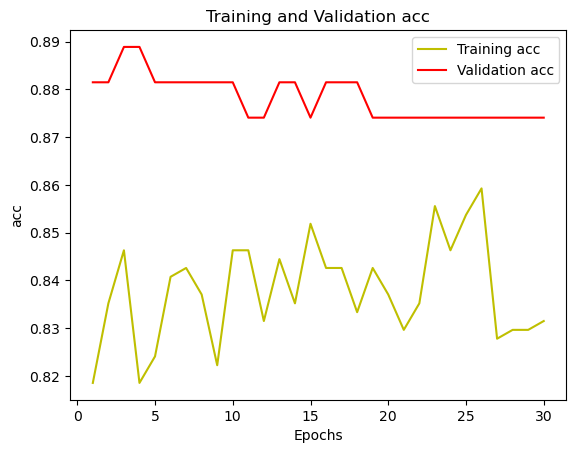

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

# Batch Size 조절 32 -> 64

In [47]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0005)  # 학습률 0.005 변경
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8443 - loss: 0.4039 - val_accuracy: 0.8815 - val_loss: 0.3111
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8355 - loss: 0.4045 - val_accuracy: 0.8815 - val_loss: 0.3119
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8272 - loss: 0.4029 - val_accuracy: 0.8741 - val_loss: 0.3123
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8330 - loss: 0.4092 - val_accuracy: 0.8741 - val_loss: 0.3124
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8498 - loss: 0.3963 - val_accuracy: 0.8815 - val_loss: 0.3128
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8210 - loss: 0.4544 - val_accuracy: 0.8815 - val_loss: 0.3139
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8519 - loss: 0.3930 - val_accuracy: 0.8815 - val_loss: 0.3144
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8362 - loss: 0.3693 - val_accuracy: 0.8815 - val_loss: 0.3140


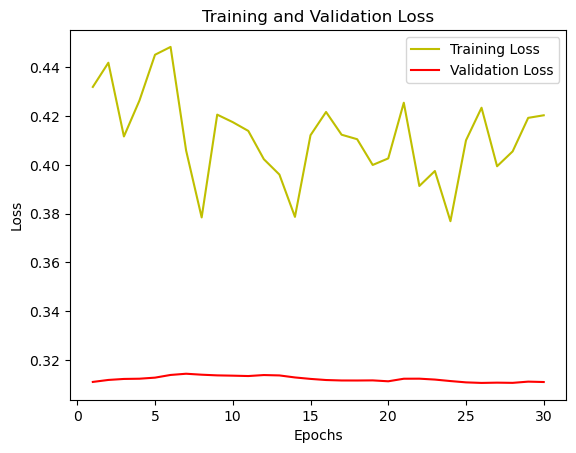

In [48]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

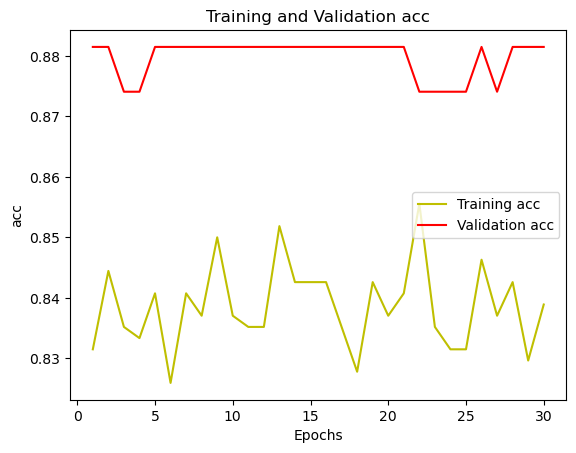

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

# 다시 learning Rate 조절 0.0005 -> 0.001

In [51]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)  # 학습률 0.0005 -> 0.001 변경 후 batch_size 32 -> 64
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8403 - loss: 0.4423 - val_accuracy: 0.8741 - val_loss: 0.3104
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8492 - loss: 0.4138 - val_accuracy: 0.8741 - val_loss: 0.3125
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8321 - loss: 0.3984 - val_accuracy: 0.8741 - val_loss: 0.3146
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8554 - loss: 0.4023 - val_accuracy: 0.8741 - val_loss: 0.3157
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8304 - loss: 0.4244 - val_accuracy: 0.8741 - val_loss: 0.3152
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8685 - loss: 0.3797 - val_accuracy: 0.8741 - val_loss: 0.3144
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8341 - loss: 0.4172 - val_accuracy: 0.8741 - val_loss: 0.3154
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8558 - loss: 0.4042 - val_accuracy: 0.8741 - val_loss: 0.3150


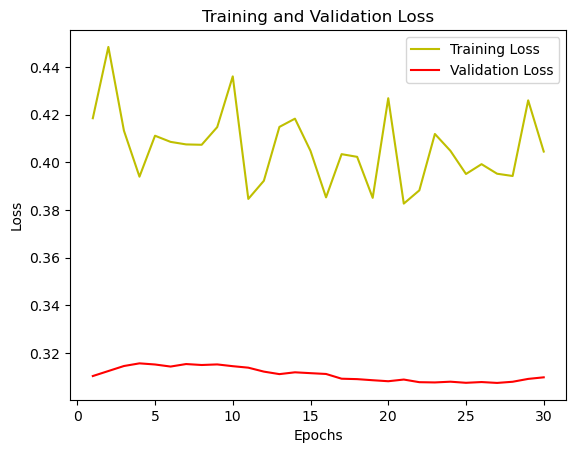

In [52]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

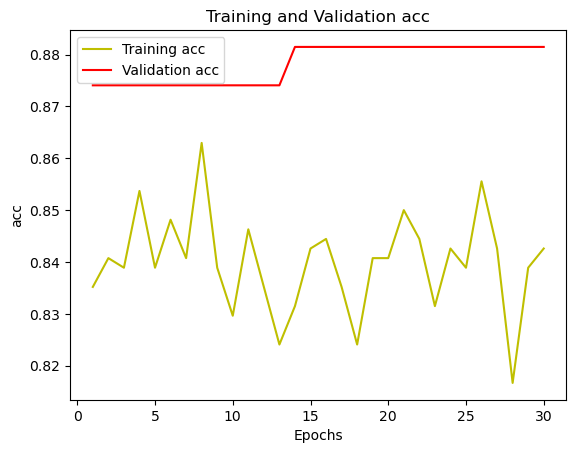

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [54]:
y_pred_clf =  model.predict(X_test_scaled)

# 확률을 0 또는 1로 변환 (0.5를 기준으로 이진화)
y_pred_clf = (y_pred_clf > 0.5).astype(int)

# F1 스코어
f1 = f1_score(y_test, y_pred_clf)

y_acc_clf = accuracy_score(y_test, y_pred_clf)

print(f'acc: {y_acc_clf:.2f}')
print(f'f1: {f1:.2f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
acc: 0.89
f1: 0.90


# Reduce LR Callback 적용 학습률 감소

In [56]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# reduce
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.0001)

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=64, validation_split=0.2, callbacks=[reduce_lr])

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8461 - loss: 0.4043 - val_accuracy: 0.8815 - val_loss: 0.3081 - learning_rate: 0.0010
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8264 - loss: 0.4380 - val_accuracy: 0.8815 - val_loss: 0.3095 - learning_rate: 0.0010
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8316 - loss: 0.4120 - val_accuracy: 0.8815 - val_loss: 0.3100 - learning_rate: 0.0010
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8227 - loss: 0.4095 - val_accuracy: 0.8815 - val_loss: 0.3098 - learning_rate: 5.0000e-04
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8493 - loss: 0.3895 - val_accuracy: 0.8815 - val_loss: 0.3095 - learning_rate: 5.0000e-04
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8573 - loss: 0.3897 - val_accuracy: 0.8815 - val_loss: 0.3089 - learning_rate: 2.5000e-04
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8497 - loss: 0.4047 - val_accur

In [57]:
y_pred_clf =  model.predict(X_test_scaled)

# 확률을 0 또는 1로 변환 (0.5를 기준으로 이진화)
y_pred_clf = (y_pred_clf > 0.5).astype(int)

# F1 스코어
f1 = f1_score(y_test, y_pred_clf)

y_acc_clf = accuracy_score(y_test, y_pred_clf)

print(f'acc: {y_acc_clf:.2f}')
print(f'f1: {f1:.2f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
acc: 0.88
f1: 0.89


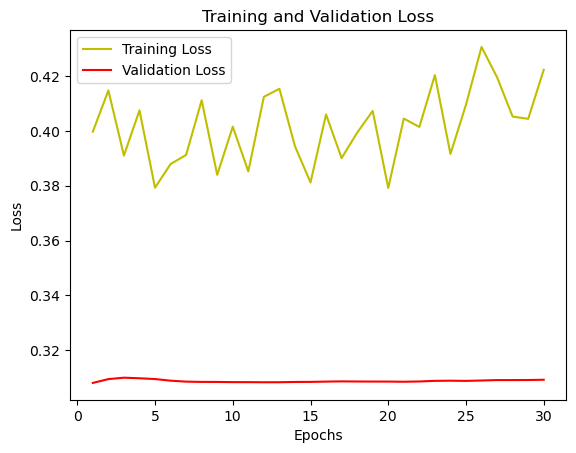

In [58]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

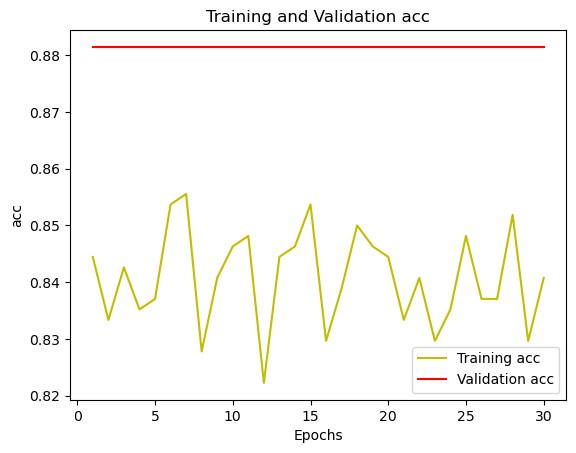

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

# Batch Size 감소 64 -> 32

In [61]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.0001)

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# batch size 64 -> 32 변경
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[reduce_lr])

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8427 - loss: 0.4293 - val_accuracy: 0.8741 - val_loss: 0.3071 - learning_rate: 0.0010
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8298 - loss: 0.3798 - val_accuracy: 0.8741 - val_loss: 0.3064 - learning_rate: 0.0010
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8316 - loss: 0.3990 - val_accuracy: 0.8741 - val_loss: 0.3088 - learning_rate: 0.0010
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8531 - loss: 0.3639 - val_accuracy: 0.8741 - val_loss: 0.3078 - learning_rate: 0.0010
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8105 - loss: 0.4145 - val_accuracy: 0.8741 - val_loss: 0.3088 - learning_rate: 5.0000e-04
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8505 - loss: 0.3566 - val_accuracy: 0.8741 - val_loss: 0.3079 - learning_rate: 5.0000e-04
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8365 - loss: 0.4189 -

In [62]:
y_pred_clf =  model.predict(X_test_scaled)

# 확률을 0 또는 1로 변환 (0.5를 기준으로 이진화)
y_pred_clf = (y_pred_clf > 0.5).astype(int)

# F1 스코어
f1 = f1_score(y_test, y_pred_clf)

y_acc_clf = accuracy_score(y_test, y_pred_clf)

print(f'acc: {y_acc_clf:.2f}')
print(f'f1: {f1:.2f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
acc: 0.89
f1: 0.89


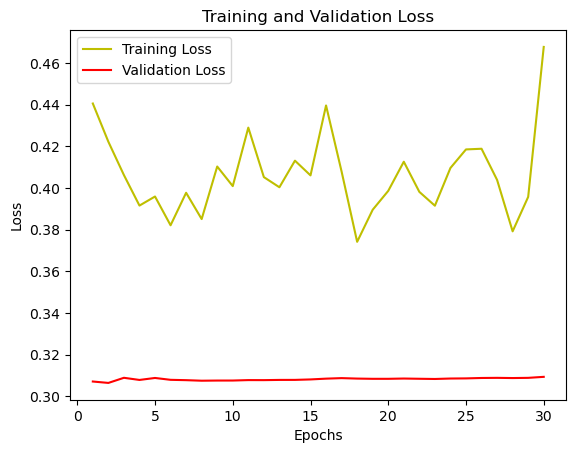

In [63]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

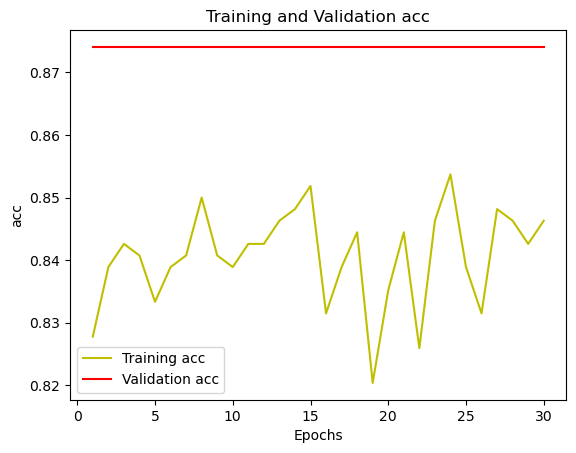

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

# Dropout 비율 감소 0.5 -> 0.4

In [66]:
model = Sequential([
    Input(shape=(7,)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)), 
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)), 
    Dropout(0.4),  
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)), 
    Dropout(0.4),  
    Dense(1, activation='sigmoid') 
])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.0001)

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# batch size 64 -> 32 변경
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[reduce_lr])

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5786 - loss: 0.7581 - val_accuracy: 0.8741 - val_loss: 0.6841 - learning_rate: 0.0010
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7032 - loss: 0.6861 - val_accuracy: 0.8667 - val_loss: 0.6089 - learning_rate: 0.0010
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7016 - loss: 0.6397 - val_accuracy: 0.8667 - val_loss: 0.5349 - learning_rate: 0.0010
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7819 - loss: 0.5700 - val_accuracy: 0.8667 - val_loss: 0.4713 - learning_rate: 0.0010
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7818 - loss: 0.5428 - val_accuracy: 0.8741 - val_loss: 0.4275 - learning_rate: 0.0010
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8091 - loss: 0.5197 - val_accuracy: 0.8741 - val_loss: 0.4020 - learning_rate: 0.0010
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8146 - loss: 0.4922 - val_accur

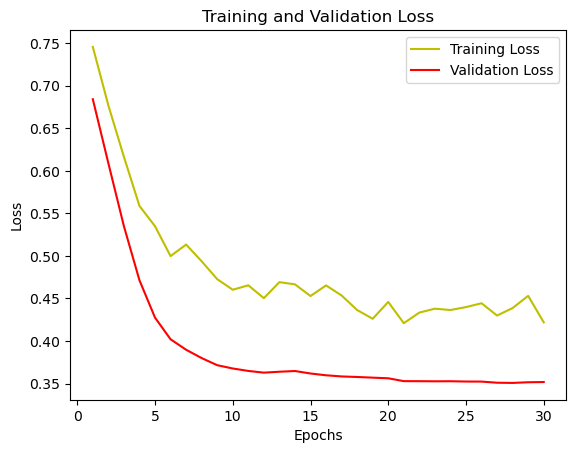

In [67]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

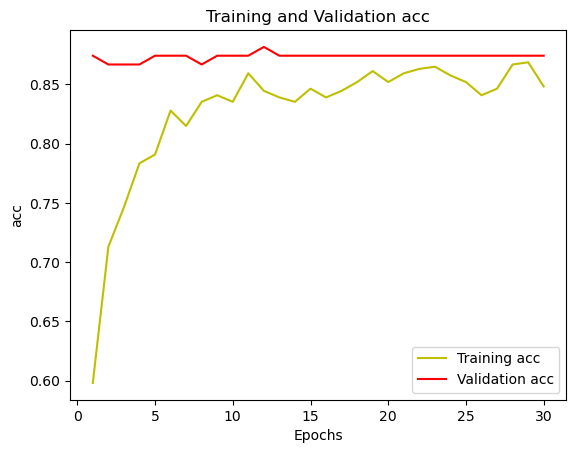

In [68]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

# Dropout 비율 감소 0.4 -> 0.3

In [69]:
y_pred_clf =  model.predict(X_test_scaled)

# 확률을 0 또는 1로 변환 (0.5를 기준으로 이진화)
y_pred_clf = (y_pred_clf > 0.5).astype(int)

# F1 스코어
f1 = f1_score(y_test, y_pred_clf)

y_acc_clf = accuracy_score(y_test, y_pred_clf)

print(f'acc: {y_acc_clf:.2f}')
print(f'f1: {f1:.2f}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
acc: 0.88
f1: 0.89


In [71]:
model = Sequential([
    Input(shape=(7,)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)), 
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)), 
    Dropout(0.3),  
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)), 
    Dropout(0.3),  
    Dense(1, activation='sigmoid') 
])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.0001)

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# batch size 64 -> 32 변경
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[reduce_lr])

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5767 - loss: 0.7309 - val_accuracy: 0.8519 - val_loss: 0.6313 - learning_rate: 0.0010
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7682 - loss: 0.6246 - val_accuracy: 0.8444 - val_loss: 0.5343 - learning_rate: 0.0010
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7836 - loss: 0.5661 - val_accuracy: 0.8444 - val_loss: 0.4682 - learning_rate: 0.0010
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8346 - loss: 0.4988 - val_accuracy: 0.8444 - val_loss: 0.4300 - learning_rate: 0.0010
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8536 - loss: 0.4629 - val_accuracy: 0.8444 - val_loss: 0.4049 - learning_rate: 0.0010
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8436 - loss: 0.4460 - val_accuracy: 0.8741 - val_loss: 0.3888 - learning_rate: 0.0010
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8495 - loss: 0.4458 - val_accura

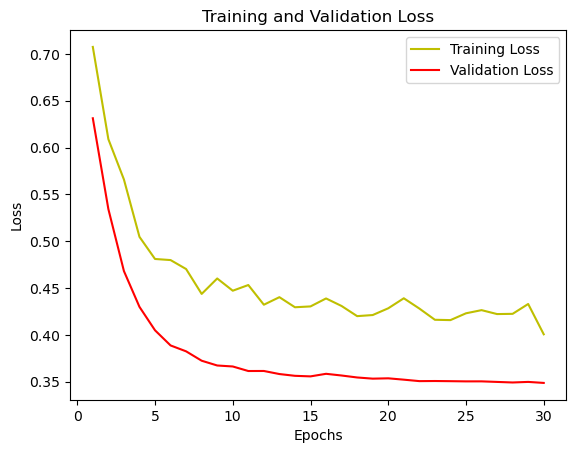

In [72]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

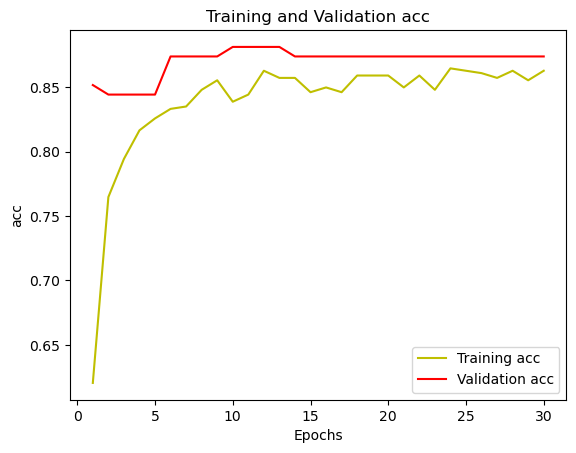

In [73]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()